# Introduction

This notebook is a part of my IBM Machine Learning Professional Certificate. 

In this notebook I will perform EDA together with Predictions about Churn Dataset as part of my IBM Machine Learning Professional Certificate: Classification Problems. 

_"One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to train a few classification machine learning algorithms on a data set that you feel passionate about, and communicate insights you found from your modeling exercise."_

## About Dataset

The dataset I want to analyze comes from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

_The `Telco customer churn data` contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index._

# Importing Needed packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# this libraries will be needed to show decision tree viz
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Load the Data

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print('Data contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Data contains 7043 rows and 21 columns


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# I will make a copy of orginal dataframe before I will drop customerID from orginal one 
df2 = df.copy()

In [8]:
# I will drop column 'customerID' because it won't bring any valuable informations to my analysis 
df.drop(columns = 'customerID', inplace=True)

## Understanding the Data

### `Telco-Customer-Churn.csv`:


* `Customers who left within the last month` – the column is called Churn

* `Services that each customer has signed up for` – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* `Customer account information` – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* `Demographic info about customers` – gender, SeniorCitizen which indicates if the customer is 65 or older, and if they have partners and dependents

# Exploratory Data Analysis

First, I would like to take a quick look of my `df` 

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.dtypes.value_counts().to_frame().rename(columns={0: 'Data Type'})

,Data Type
object,17
int64,2
float64,1


After running the code above we can see what type of columns we work with. This is important informations due to the fact that machine learning algorithms needs some features engeenering to be done before running. 

Next, I would like to check for missing values. 

In [13]:
df.isnull().sum().to_frame().rename(columns={0: 'Number of missing values'})

,Number of missing values
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


It seems that dealing with missing values will not be a problem that I need to face in this notebook. 

Customers by services they use

Before I will transform the variables using encoding techniques I want to know how they look likes

Text(0.5, 0.98, 'Customers by services')

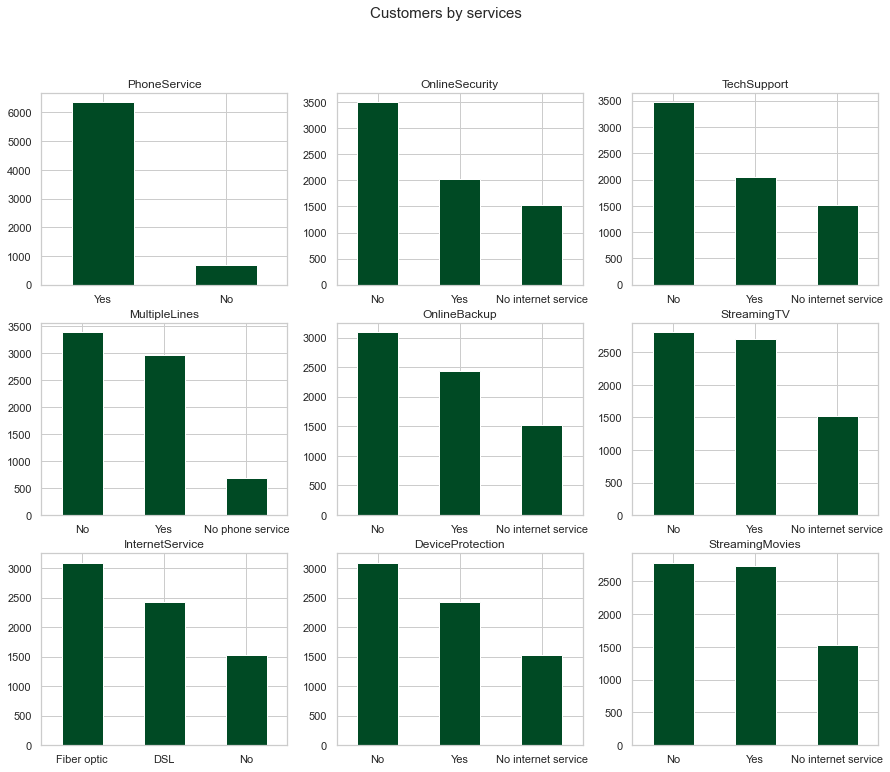

In [14]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('ocean')

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
    
plt.suptitle('Customers by services', size=15)
#plt.savefig('Customers by services.png')

Now its time to take a closer look at data types I have and prepere them for machine learning algorithms. 

**Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric.**

In [15]:
# check for unique values in each columns 
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [16]:
# binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [17]:
# categorical variables
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [18]:
# check what value are hidden by categorical_variables
[[i, list(df[i].unique())] for i in categorical_variables]

[['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']]]

In [19]:
# from the list above I will only treat 'Contract' as ordinal variable
ordinal_variables = ['Contract']

In [20]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [21]:
# now I will add 'tenure' to my ordinal_variables
ordinal_variables.append('tenure')

In [22]:
# I will group values from 'tenure' column into 5 bins
df['tenure'] = pd.cut(df['tenure'], bins=5,
                      labels=['up to 14 mths', '14-28 mths', '28-43 mths', '43-57 mths', 'more than 57 mths'])

In [23]:
df['tenure'].value_counts()

up to 14 mths        2371
more than 57 mths    1610
14-28 mths           1126
28-43 mths            989
43-57 mths            947
Name: tenure, dtype: int64

In [24]:
# now I will set numeric_variables
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))
numeric_variables

['MonthlyCharges', 'TotalCharges']

In [25]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure              category
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

Having set up all of this variables, next I will use encoding techniques to process them further.

In [27]:
# initialize object
lb, le = LabelBinarizer(), LabelEncoder()

In [28]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [29]:
df[ordinal_variables].astype('category').describe()

,Contract,tenure
count,7043,7043
unique,3,5
top,0,4
freq,3875,2371


In [30]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [31]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [32]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,2.441715,1.469795,0.00,1.00,3.000,4.0000,4.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
Contract,7043.0,0.690473,0.833755,0.00,0.00,0.000,1.0000,2.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.000,1.0000,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


# Data Vizualization

First I would like to see correlation between my target variable `Churn` and other variables. 

In [34]:
coor = df.corr()
coor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No phone service,MultipleLines_Yes
gender,1.000000,-0.001874,-0.001808,0.010517,-0.002376,-0.006488,0.000126,-0.011754,-0.014569,0.000048,...,-0.002105,0.001215,0.000752,0.013744,0.006026,-0.013773,0.006026,-0.017021,0.006488,-0.008414
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,-0.026850,0.008576,-0.142554,0.156530,0.220173,0.102411,...,0.059428,-0.024135,0.171718,-0.153477,-0.182742,0.066572,-0.182742,-0.038653,-0.008576,0.142948
Partner,-0.001808,0.016479,1.000000,0.452676,-0.096223,0.017706,0.294806,-0.014877,0.096848,0.319072,...,0.153786,0.082029,-0.083852,-0.095125,0.000615,0.141498,0.000615,0.143106,-0.017706,0.142057
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.058634,-0.001762,0.243187,-0.111377,-0.113890,0.064653,...,0.013963,0.060267,-0.150642,0.059071,0.139812,0.023671,0.139812,0.080972,0.001762,-0.024526
tenure,-0.002376,-0.026850,-0.096223,-0.058634,1.000000,-0.006452,-0.058526,-0.001650,-0.055745,-0.116062,...,-0.076032,-0.062270,0.054689,0.060929,0.003739,-0.057707,0.003739,-0.059140,0.006452,-0.086922
PhoneService,-0.006488,0.008576,0.017706,-0.001762,-0.006452,1.000000,0.002247,0.016505,0.247398,0.113008,...,-0.071227,-0.007721,0.003062,-0.003319,0.172209,-0.052312,0.172209,-0.092893,-1.000000,0.279690
Contract,0.000126,-0.142554,0.294806,0.243187,-0.058526,0.002247,1.000000,-0.176733,-0.074195,0.450306,...,0.219310,0.210659,-0.342575,-0.004882,0.242388,0.155085,0.242388,0.245530,-0.002247,0.107114
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,-0.001650,0.016505,-0.176733,1.000000,0.352150,0.157830,...,0.103797,-0.013589,0.208865,-0.205398,-0.321013,0.126735,-0.321013,-0.003636,-0.016505,0.163530
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,-0.055745,0.247398,-0.074195,0.352150,1.000000,0.651065,...,0.482692,0.030550,0.271625,-0.377437,-0.763557,0.441780,-0.763557,0.296594,-0.247398,0.490434
TotalCharges,0.000048,0.102411,0.319072,0.064653,-0.116062,0.113008,0.450306,0.157830,0.651065,1.000000,...,0.522881,0.182663,-0.060436,-0.294708,-0.374878,0.510100,-0.374878,0.412619,-0.113008,0.469042


Text(0.5, 1.0, 'Heatmap for all variables')

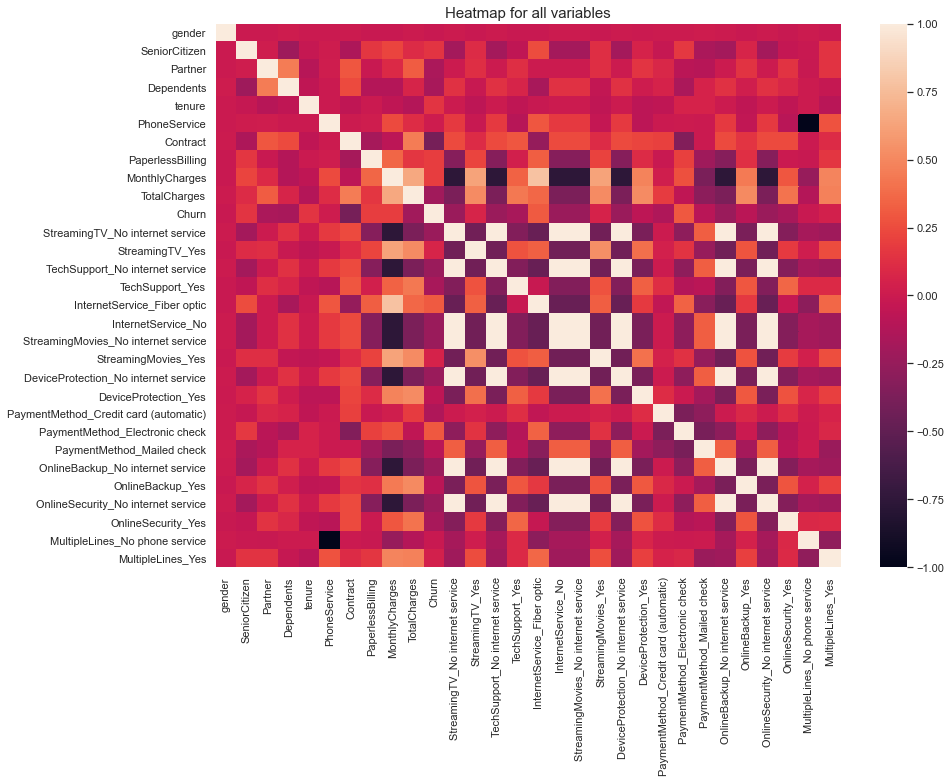

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(coor)
plt.title('Heatmap for all variables', size=15)
#plt.savefig('heatmap.png')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

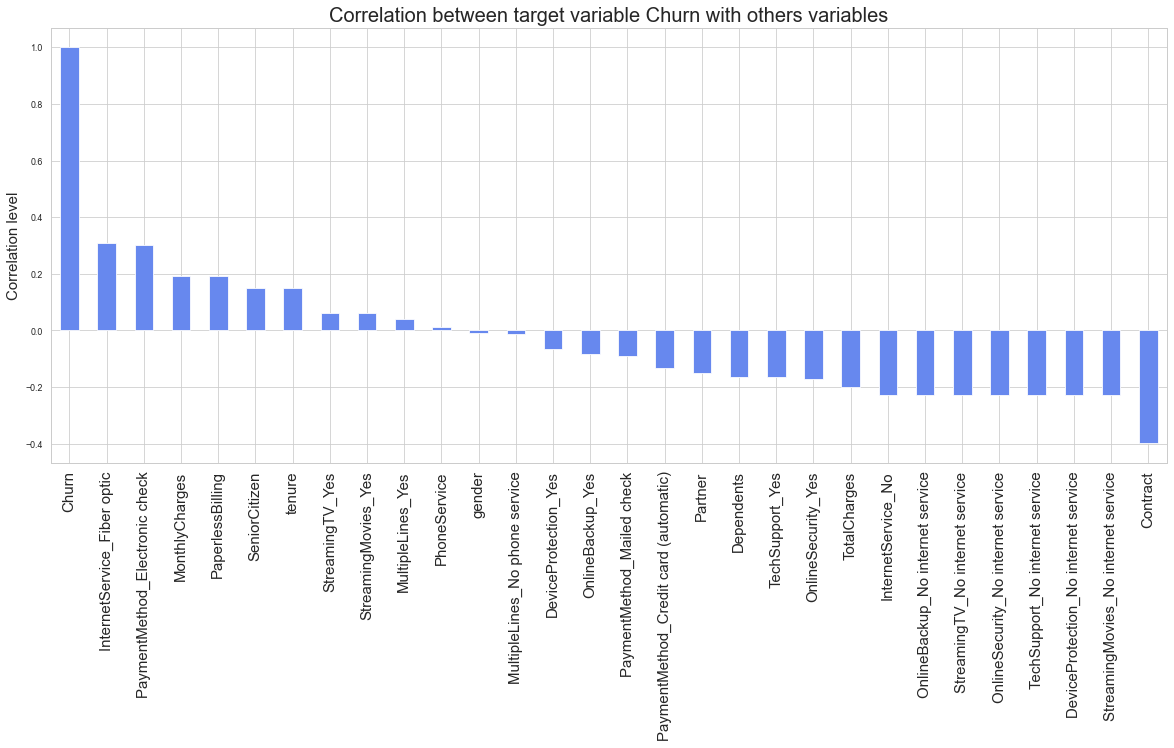

In [36]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('coolwarm')

plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title('Correlation between target variable Churn with others variables', size=20)
plt.ylabel('Correlation level', size=15)
plt.xticks(size=15)
#plt.savefig('corr_churn_to_all.png')

Based on heatmap we can cleary see how features are correlated between them but even better look inside gave us the graph above. It is explaining in a convinient way how our target variable `Churn` is correlated between others variables in my dataset. Key insights: 

* three variables with which Churn variable is positive correlated the most:
    * InternetService_Fiber optic
    * PaymentMethod_Electronic check
    * MonthlyCharges
* three variables with which Churn variable is negative correlated the most:
    * Contract
    * StreamingMovies_No internet service
    * DeviceProtection_No internet service
* a barely noticeable correlation exists between the target and the variables:
    * PhoneService
    * gender
    * MultipleLines_No phone service

Now I would like to show and examine how my two numerical variable looks. This information will tell me if my data are skew and if it so the further feature engineering will be needed.

I will look at `MonthlyCharges` and `TotalCharges`

Text(0.5, 1.0, 'Distribution of TotalCharges')

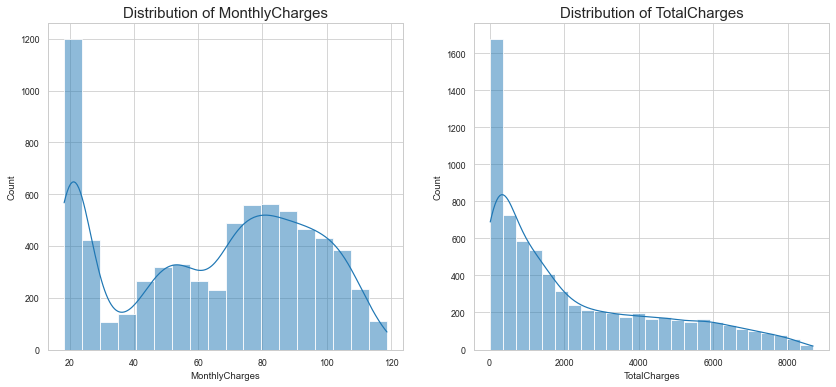

In [37]:
sns.set_palette('tab20')
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of MonthlyCharges', size=15)

plt.subplot(1,2,2)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges', size=15)
#plt.savefig('numeric_distribution.png')

In [38]:
df[['MonthlyCharges', 'TotalCharges']].skew().to_frame().rename(columns={0: 'Skew Level'})

,Skew Level
MonthlyCharges,-0.220524
TotalCharges,0.961642


It seems to be clear right now that one of numeric variable `TotalCharges` is right skewed. To deal with this problem I will log transformation on this variable to make this variable more normal distributed. 

In [39]:
df['TotalCharges'] = df['TotalCharges'].apply(np.log1p)

Text(0.5, 1.0, 'Distribution of TotalCharges after Log Transformation')

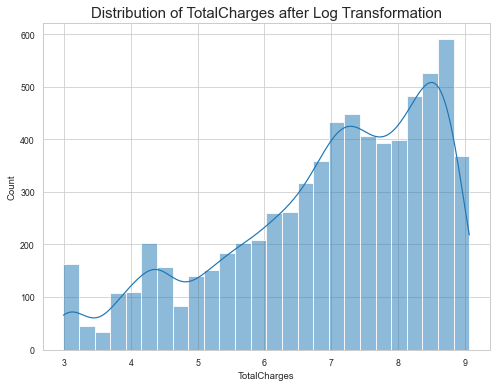

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges after Log Transformation', size=15)
#plt.savefig('totalCharges_after_log.png')

In [41]:
df[['TotalCharges']].skew().to_frame().rename(columns={0: 'Skew after log1p'})

,Skew after log1p
TotalCharges,-0.743089


In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,4,0,0,1,29.85,3.429137,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,0,1,1,1,0,56.95,7.544597,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,4,1,0,1,53.85,4.692723,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,2,0,1,0,42.30,7.518471,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,0,4,1,0,1,70.70,5.028148,...,0,0,1,0,0,0,0,0,0,0


Now, I would like to take a closer look at demographics data I have. 

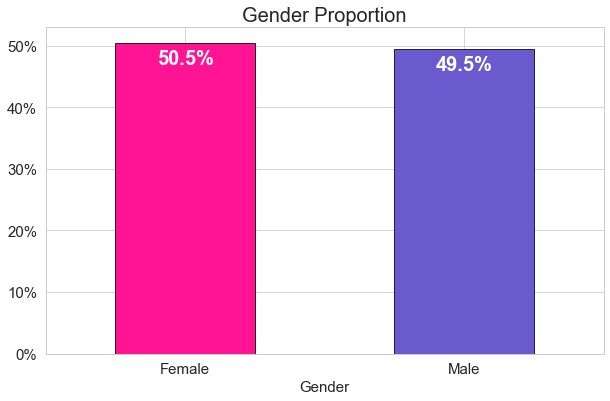

In [43]:
colors = ['#FF1493', '#6A5ACD']

plt.figure(figsize=(10,6))

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors,
                                                       tick_label=['Female', 'Male'],
                                                       edgecolor='black')

ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'], size=15)
plt.xlabel('Gender', size=15)
ax.set_xticklabels(['Female', 'Male'], size=15)
plt.title('Gender Proportion', size=20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=20,
            color='white',
           weight = 'bold')
#plt.savefig('gender_proportion.png')

Text(0.5, 1.0, 'Percentage of Senior Citizens')

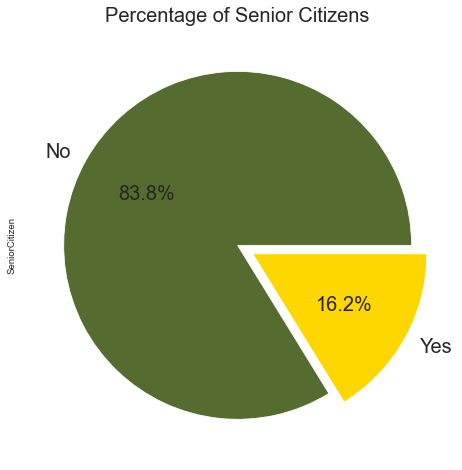

In [44]:
colors = ['#556b2f', '#FFD700']
explode = (0, 0.1)

plt.figure(figsize=(14,8))
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], fontsize = 20, colors=colors, explode=explode )   


plt.title('Percentage of Senior Citizens', size=20)
#plt.savefig('percent_senior.png')

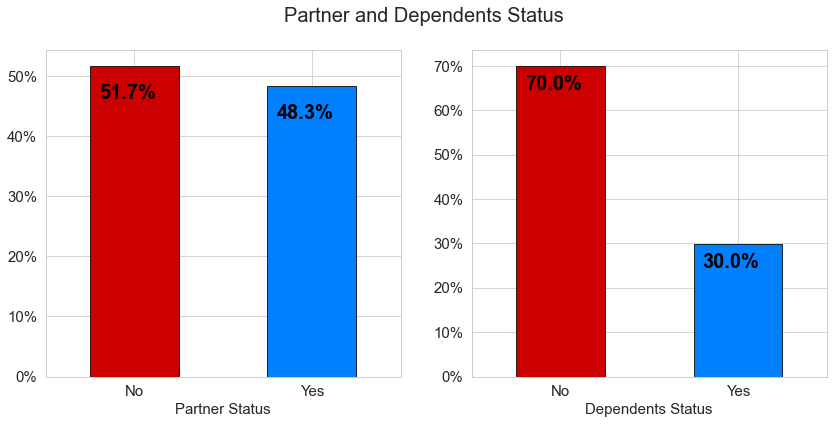

In [45]:
colors = ['#cc0000', '#007fff']

plt.figure(figsize=(14,6))
plt.suptitle('Partner and Dependents Status', size=20)

# create first barplot

plt.subplot(1,2,1)
ax = (df['Partner'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors,
                                                       tick_label=['No', 'Yes'],
                                                       edgecolor='black')

ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'], size=15)
plt.xlabel('Partner Status', size=15)
ax.set_xticklabels(['No', 'Yes'], size=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.05, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=20,
            color='black',
           weight = 'bold')

# create second barplot

plt.subplot(1,2,2)
ax = (df['Dependents'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors,
                                                       tick_label=['No', 'Yes'],
                                                       edgecolor='black')

ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'], size=15)
plt.xlabel('Dependents Status', size=15)
ax.set_xticklabels(['No', 'Yes'], size=15)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.05, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=20,
            color='black',
           weight = 'bold')
#plt.savefig('partner_depend_status.png')

**Summary:** 

* there are equal spread of gender in our dataset with slightly better result for Female which pose 50.5% and Male which pose 49.5% 
* `SeniorCitizen` column indicates if the customer is 65 or older, we now thanks to pie chart presented above that more than 80% of our customers are less then 65 year old, and those within this age or older pose 16.2%
* as we can see on a bar plot above, the result for Partner Status are spread equal in dataset: 51.7% don't have partner and 48.3% declared that have one
* in other hand the result for Dependents Status are not spread so equal and we can see that 70% of our customer don't have any dependents and only 30% declared that have one 

As I already looked at some binary variables, it is time to analyze two categorical ordinal variables I have in my dataset - `tenure` and `Contract`

[Text(0, 0, 'more than 57 mths'),
 Text(0, 0, '43-57 mths'),
 Text(0, 0, 'up to 14 mths'),
 Text(0, 0, '14-28 mths'),
 Text(0, 0, '28-43 mths')]

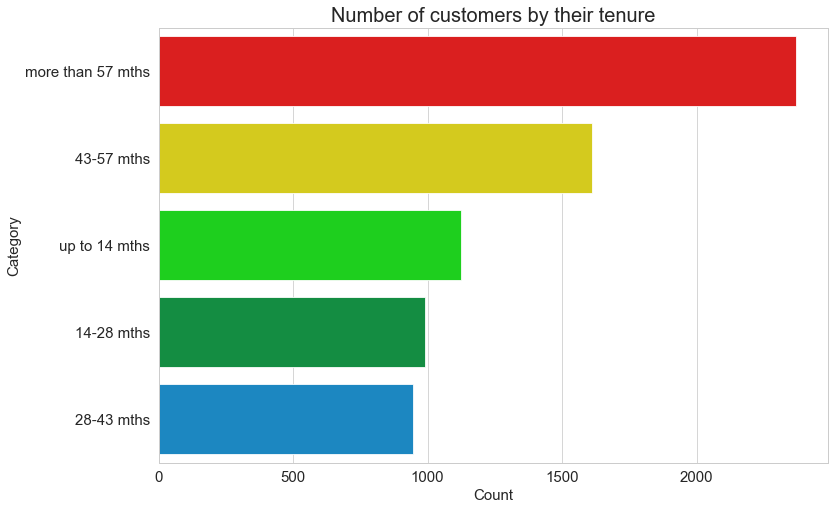

In [46]:
sns.set_palette('nipy_spectral_r')
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, y='tenure', order = df['tenure'].value_counts().index)
plt.title('Number of customers by their tenure', size=20)
plt.xlabel('Count', size=15)
plt.xticks(size=15)
plt.ylabel('Category', size=15)
ax.set_yticklabels(['more than 57 mths', '43-57 mths', 'up to 14 mths', '14-28 mths', '28-43 mths'],
                   size=15)
#plt.savefig('tenure_cat.png')

[Text(0, 0, 'Month-to-month'), Text(0, 0, 'Two year'), Text(0, 0, 'One year')]

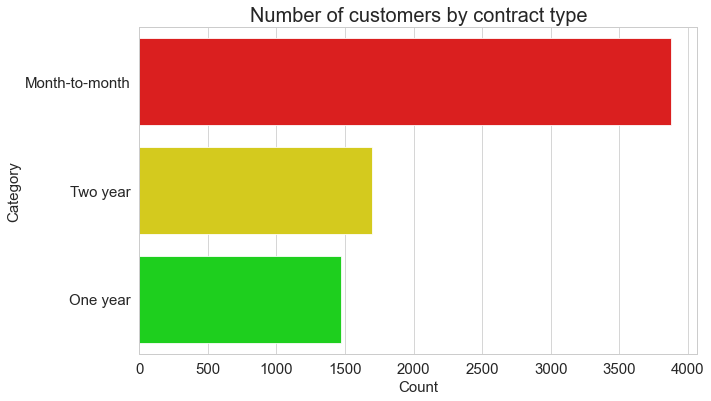

In [47]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='Contract', order = df['Contract'].value_counts().index)
plt.title('Number of customers by contract type', size=20)
plt.xlabel('Count', size=15)
plt.xticks(size=15)
plt.ylabel('Category', size=15)
ax.set_yticklabels(['Month-to-month', 'Two year', 'One year'], size=15)
#plt.savefig('contract_type.png')

**Summary:** 

* the main contract type is `Month-to-month` with more than 3800 customers had it, next there are `Two year` contract and `One year` contract with less than 1500 customers had it 
* more than 55% (two main tenure category) of customers are with us more than 43 months which is more than 3 years 
* values for three remaining category in tenure are spread similar and are about 15% in each one 

Finally, I want to look closer on my target variable `Churn` and compere it relationship to other variables 

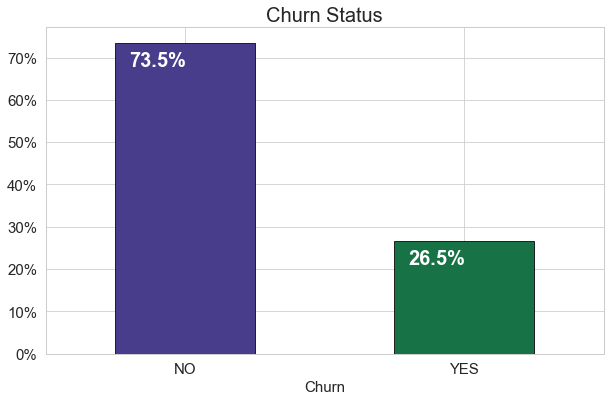

In [48]:
colors = ['#483d8b', '#177245']

plt.figure(figsize=(10,6))

ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors,
                                                       tick_label=['No', 'Yes'],
                                                       edgecolor='black')

ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'], size=15)
plt.xlabel('Churn', size=15)
ax.set_xticklabels(['NO', 'YES'], size=15)
plt.title('Churn Status', size=20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.05, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=20,
            color='white',
           weight = 'bold')
#plt.savefig('churn_status.png')

First thing important to notice is a fact that our target variable is highly imbalanced

73.5% of customers will stay with us as a telecommunication provider and 26.5% will churn

Clearly the data is skewed as we would expect a large majority of the customers to not churn

Because of this highly imbalanced in target variable further action will be needed to be done with sampling

**Churn vs. MonthlyCharges**

Text(0.5, 1.0, 'Churn against monthly charges')

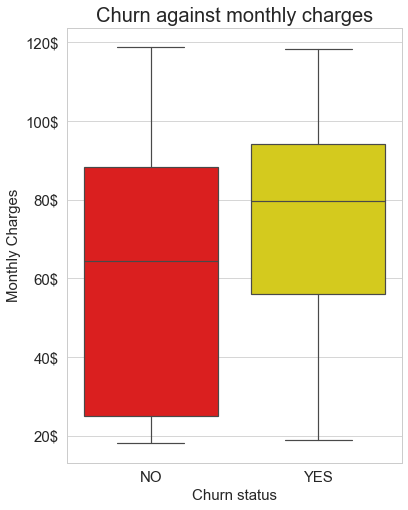

In [49]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'])

plt.xlabel('Churn status', size=15)
ax.set_xticklabels(['NO', 'YES'], size=15)
plt.ylabel('Monthly Charges', size=15)
ax.set_yticklabels(['0', '20$', '40$', '60$', '80$', '100$', '120$'], size=15)

plt.title('Churn against monthly charges', size=20)
#plt.savefig('churn_monthlyCharges.png')

**Churn vs. Contract**

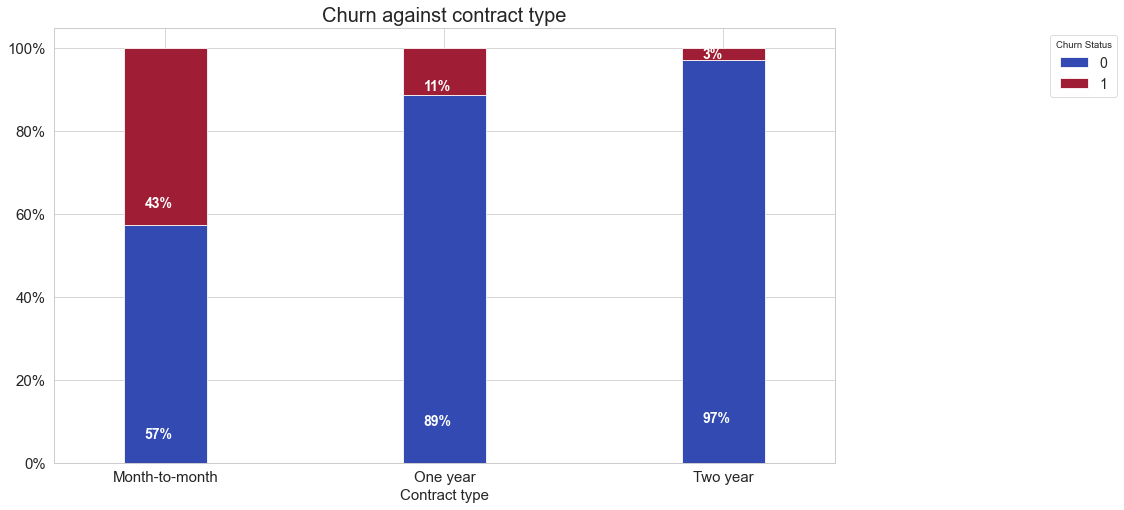

In [50]:
colors = ['#324ab2', '#9f1d35']
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                             width=.3,
                                                             stacked=True,
                                                             rot=0,
                                                             color=colors,
                                                             figsize=(14,8))

plt.xlabel('Contract type', size=15)
ax.set_xticklabels(['Month-to-month', 'One year', 'Two year'], size=15)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], size=15)

plt.legend( bbox_to_anchor=(1.37,1), prop={'size':14}, title='Churn Status')
plt.title('Churn against contract type', size=20)

    
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.10*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#plt.savefig('churn_contract.png')

**Churn vs. Payment Method**

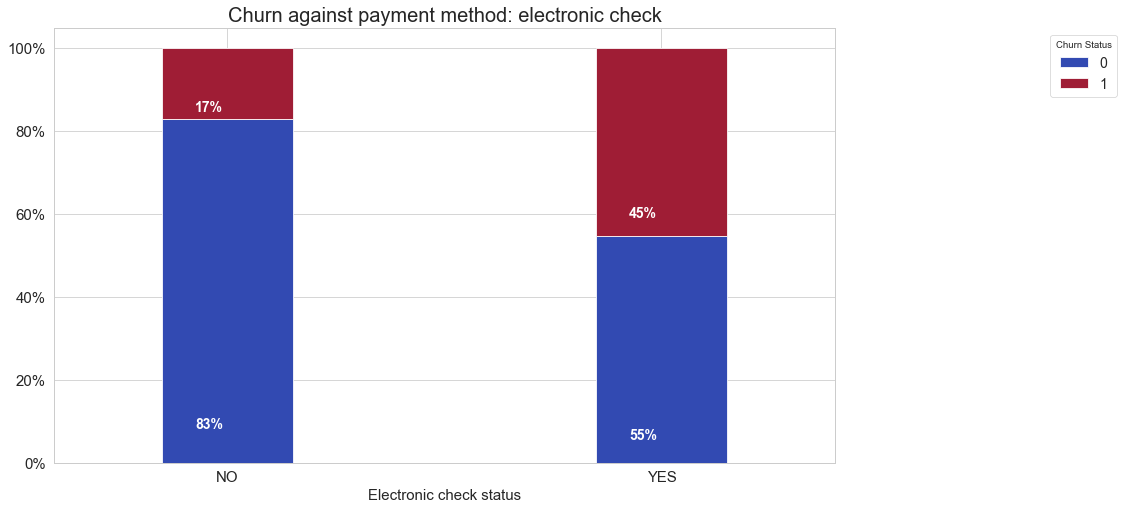

In [51]:
colors = ['#324ab2', '#9f1d35']
payment_churn = df.groupby(['PaymentMethod_Electronic check', 'Churn']).size().unstack()

ax = (payment_churn.T*100.0 / payment_churn.T.sum()).T.plot(kind='bar',
                                                             width=.3,
                                                             stacked=True,
                                                             rot=0,
                                                             color=colors,
                                                             figsize=(14,8))

plt.xlabel('Electronic check status', size=15)
ax.set_xticklabels(['NO', 'YES'], size=15)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], size=15)

plt.legend( bbox_to_anchor=(1.37,1), prop={'size':14}, title='Churn Status')
plt.title('Churn against payment method: electronic check', size=20)

    
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.10*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#plt.savefig('churn_payment.png')

**Churn vs. Senior Citizen Status**

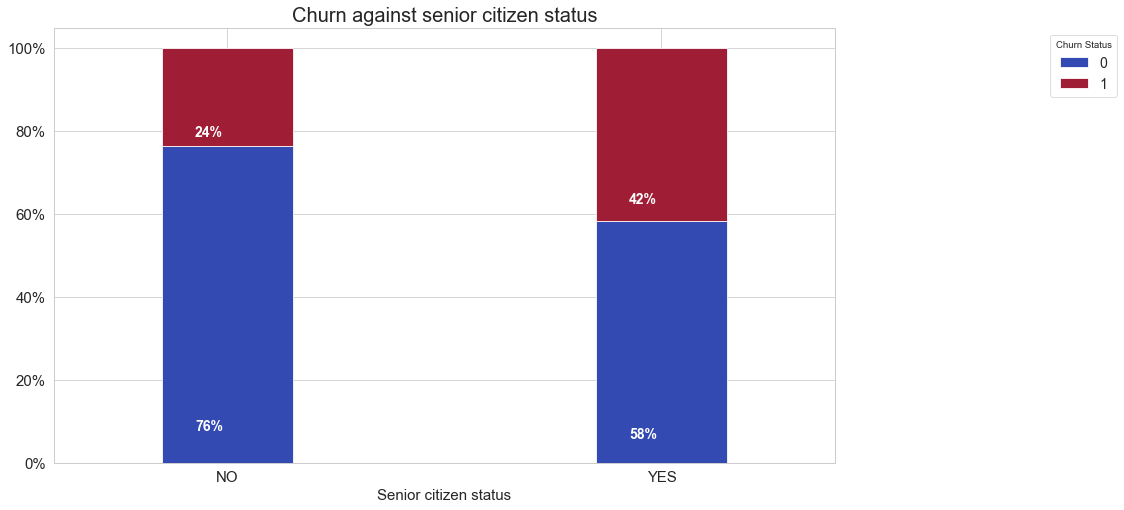

In [52]:
colors = ['#324ab2', '#9f1d35']
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (senior_churn.T*100.0 / senior_churn.T.sum()).T.plot(kind='bar',
                                                             width=.3,
                                                             stacked=True,
                                                             rot=0,
                                                             color=colors,
                                                             figsize=(14,8))

plt.xlabel('Senior citizen status', size=15)
ax.set_xticklabels(['NO', 'YES'], size=15)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], size=15)

plt.legend( bbox_to_anchor=(1.37,1), prop={'size':14}, title='Churn Status')
plt.title('Churn against senior citizen status', size=20)

    
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.10*height),
                color = 'white',
               weight = 'bold',
               size = 14)
#plt.savefig('churn_senior_status.png')

### Scaling

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7043.0,2.441715,1.469795,0.000000,1.000000,3.000000,4.000000,4.000000
PhoneService,7043.0,0.903166,0.295752,0.000000,1.000000,1.000000,1.000000,1.000000
Contract,7043.0,0.690473,0.833755,0.000000,0.000000,0.000000,1.000000,2.000000
PaperlessBilling,7043.0,0.592219,0.491457,0.000000,0.000000,1.000000,1.000000,1.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.0,6.943387,1.546438,2.985682,5.997571,7.243138,8.241634,9.069445


There are four columns were values are above 0-1 scale:
* tenure
* Contract
* MonthlyCharges
* TotalCharges

To prepare my dataset for machine learning algorithms I will first scale this variables using `MinMaxScaler`

In [54]:
scale = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']

In [55]:
mm = MinMaxScaler()

In [56]:
for column in [scale]:
    df[column] = mm.fit_transform(df[column])

In [57]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.50,0.50,0.0,0.00,1.00,1.00,1.0
SeniorCitizen,7043.0,0.16,0.37,0.0,0.00,0.00,0.00,1.0
Partner,7043.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
Dependents,7043.0,0.30,0.46,0.0,0.00,0.00,1.00,1.0
tenure,7043.0,0.61,0.37,0.0,0.25,0.75,1.00,1.0
PhoneService,7043.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0
Contract,7043.0,0.35,0.42,0.0,0.00,0.00,0.50,1.0
PaperlessBilling,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0
MonthlyCharges,7043.0,0.46,0.30,0.0,0.17,0.52,0.71,1.0
TotalCharges,7032.0,0.65,0.25,0.0,0.50,0.70,0.86,1.0


### Sampling Method

First generate X and Y variable

In [58]:
df.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
Contract                                  0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
TechSupport_No internet service           0
TechSupport_Yes                           0
InternetService_Fiber optic               0
InternetService_No                        0
StreamingMovies_No internet service       0
StreamingMovies_Yes                       0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check  

It seems that there are 11 missing values in TotalCharges column, so i the next cell I will drop them all. 

In [59]:
df.dropna(inplace=True)

In [60]:
y_col = 'Churn'

X = df.drop(y_col, axis=1)
y = df[y_col]

train_test_split 

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Check the size of y_train data before sampling method

In [62]:
counter = Counter(y_train)
print('Before sampling method', counter)

Before sampling method Counter({0: 3614, 1: 1308})


In [63]:
# Minority Over Sampling Technique

smt = SMOTE()
x_train_over, y_train_over = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_over)
print('After SMOTE method', counter)

After SMOTE method Counter({1: 3614, 0: 3614})


After apply the upsampling technique the number of samples of both classes are same

## Logistic Regression

I can run Logistic Regression model for impalanced and oversampling data and compare the results. 

In [64]:
lr = LogisticRegression()

lr = lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [65]:
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [66]:
# training with oversampled data

lr2 = LogisticRegression(max_iter=500)
lr2 = lr2.fit(x_train_over, y_train_over)
y_pred_lr2 = lr2.predict(x_test)

In [67]:
print('Classification Report:')
print(classification_report(y_test, y_pred_lr2))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1549
           1       0.52      0.76      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In this case the overall accuracy for oversampling data got worse result than training data without sampling method. 

The accuracy for first set - without sampling method is 80%, and for oversampling data 75%. But it doesn't meant that model with oversampling data is so bad. What is worth to noticed is a fact that recall for predicting class 1 is much more better than in first case and result was improve from level of 52% to 76%. 

#### Logistic Regression with Regularization

In [68]:
lr_cv_model = LogisticRegression(max_iter=100000)

In [69]:
params ={"C": np.geomspace(0.06, 6.0, 10),
         "penalty": ["l1","l2", 'elasticnet']}

lr_cv = GridSearchCV(lr_cv_model, params, cv=10)

In [70]:
lr_cv.fit(x_train, y_train)

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_sele

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([0.06      , 0.10008603, 0.16695356, 0.27849533, 0.46455821,
       0.7749298 , 1.29266081, 2.1562882 , 3.5969055 , 6.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [71]:
print("tuned hyperparameters :(best parameters) ",lr_cv.best_params_)

tuned hyperparameters :(best parameters)  {'C': 1.29266081401913, 'penalty': 'l2'}


In [72]:
print("accuracy :",lr_cv.best_score_)

accuracy : 0.8100356206401822


In [73]:
y_pred_lr_cv = lr_cv.predict(x_test)

In [74]:
print('Classification Report:')
print(classification_report(y_test, y_pred_lr_cv))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Check how oversampled data will perform

In [75]:
lr_cv_over = GridSearchCV(lr_cv_model, params, cv=10)
lr_cv_over.fit(x_train_over, y_train_over)

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_sele

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([0.06      , 0.10008603, 0.16695356, 0.27849533, 0.46455821,
       0.7749298 , 1.29266081, 2.1562882 , 3.5969055 , 6.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [76]:
print("tuned hyperparameters :(best parameters) ",lr_cv_over.best_params_)
print("accuracy :",lr_cv_over.best_score_)

tuned hyperparameters :(best parameters)  {'C': 6.0, 'penalty': 'l2'}
accuracy : 0.8011953885587524


In [77]:
y_pred_lr_cv_over = lr_cv_over.predict(x_test)

In [78]:
print('Classification Report:')
print(classification_report(y_test, y_pred_lr_cv_over))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1549
           1       0.53      0.73      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



For tuned Logistic Regression our model with and without data which were sampled before got a score similar to the previous model - vanilla Logistic Regression. The overall accuracy were 80% for normal training data and 76% for sampled data. Like it was before the recall for tuned Logistic Regression on sampled data did better job for predicting class 1 - which are customer who are going to churn. The score of recall were improve from 52% to 73%. 

### K-Nearest Neighbor

In [79]:
# create K-Nearest Neighbor object

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [80]:
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1549
           1       0.54      0.50      0.52       561

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110



The overall accuracy is 75% but the model doesn't work well in predicting class 1. The recall is this case is 50%.

In [81]:
knn_over = KNeighborsClassifier(n_neighbors=3)
knn_over = knn_over.fit(x_train_over, y_train_over)
y_pred_knn_over = knn_over.predict(x_test)

In [82]:
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_over))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1549
           1       0.46      0.65      0.54       561

    accuracy                           0.70      2110
   macro avg       0.65      0.68      0.66      2110
weighted avg       0.75      0.70      0.72      2110



Now with oversampled data the accuracy is 71% which is worse score but recall for predicting class 1 was increased to 67%. 

What is optimal value of **k**?

I will check k value from 1 to 40

Next, I will plot F-1 Score and the Error Rate (1-Accuracy)

In [83]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

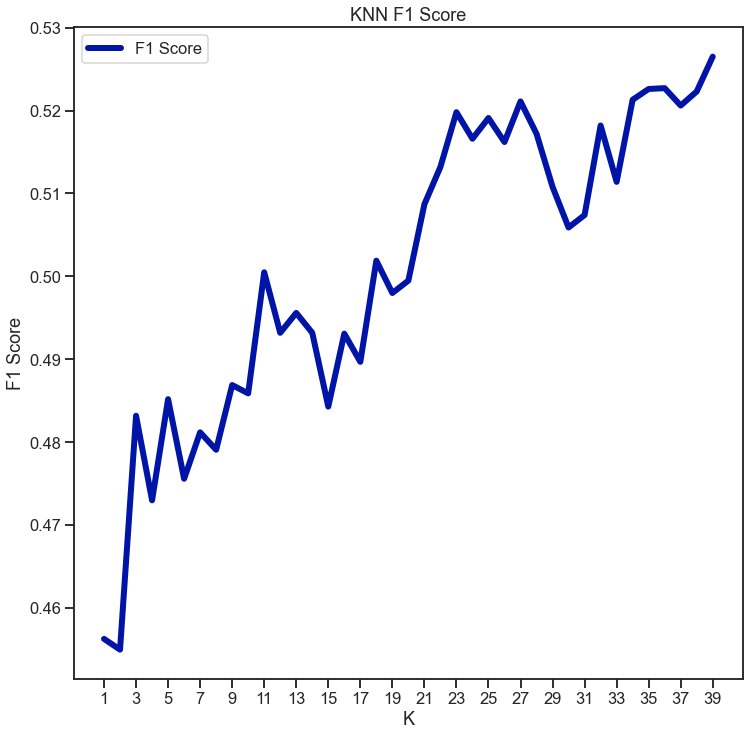

In [84]:
# Plot F1 results

sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color='#0014a8', figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
#plt.savefig('knn_f1_score.png')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

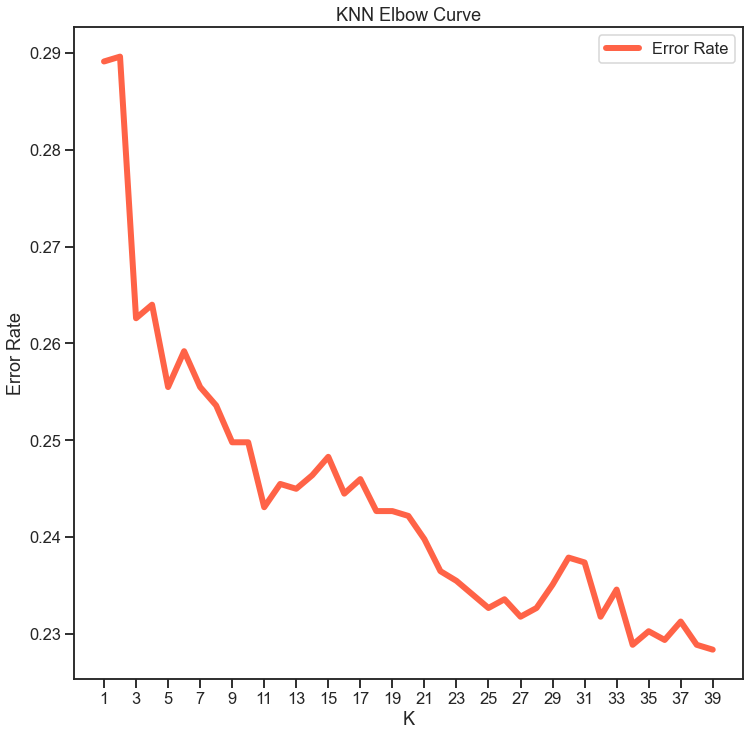

In [85]:
# Plot Accuracy (Error Rate) results

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color='#ff6347', figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')

Based on the elbow curve the most likely value for k for my training data is 27

In [86]:
knn_best = KNeighborsClassifier(n_neighbors=27)
knn_best = knn_best.fit(x_train, y_train)
y_pred_knn_best = knn_best.predict(x_test)

In [87]:
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [88]:
knn_best_over = KNeighborsClassifier(n_neighbors=27)
knn_best_over = knn_best_over.fit(x_train_over, y_train_over)
y_pred_knn_best_over = knn_best_over.predict(x_test)

In [89]:
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_best_over))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1549
           1       0.45      0.82      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.69      0.71      2110



And again the overall accuracy thanks to elbow method which found optimal value of K were increased from 75% to 78% based on our training data

For sampled data the overall accuracy slighly decreased from 71% to 69% but again I can noticed that thanks to sampled data the precision in predicting class 1 increased from 65% to 81% in this case

Take a look how confusion matrix looks

Text(0.5, 1.0, 'Confusion Matrix for training data')

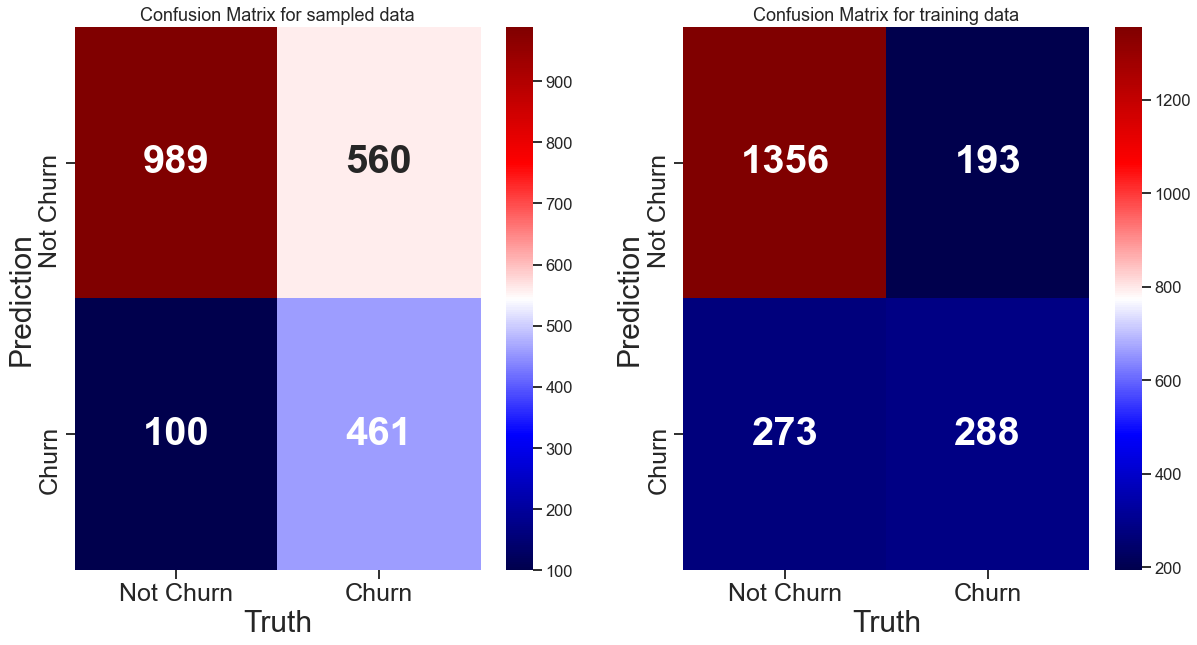

In [90]:
# Plot confusion matrix

fig, ax = plt.subplots(figsize=(20,10))

plt.subplot(1,2,1)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_best_over), annot=True, cmap = 'seismic', fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Truth', fontsize=30)
plt.title('Confusion Matrix for sampled data')

plt.subplot(1,2,2)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_best), annot=True, cmap = 'seismic', fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Truth', fontsize=30)
plt.title('Confusion Matrix for training data')

#plt.savefig('confiusion_matrix.png')

* The confusion matrix above represent information gain from two earlier created KNN models. On the left side I ploted information based on sampled data and on the right are normal training data. Just in quick remind the overall accuracy for first one was 69% and for second one was 78%.

* One important thing to notice is a fact that in our sampled confiusion matrix I better predict class 1, there are 461 good predictions compared to 288 on the right confiusion matrix 

* Unfortunately precision (how many of my positive are actual positive class) for this class 1 predictions is not so sufficient as I wish to be, it is only 45% for left side matrix and 60% for right side matrix

* Type I error for sampled data are lower compared to right side matrix

* Type II error on the other hand is higher in our model with sampled data, this score is should be lower because it actually say that I predicted class 0 (Not Churn) when it is actual class 1 (Churn)

## Support Vector Machines

First, like I did with KNN model I will examinate acuuracy score for plain SVC model for training and sampled data. 

In [91]:
svc = SVC(kernel='rbf', gamma=1.0, C=10.0)

In [92]:
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

In [93]:
print('Classification Report:')
print(classification_report(y_test, y_pred_svc))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1549
           1       0.55      0.43      0.48       561

    accuracy                           0.75      2110
   macro avg       0.68      0.65      0.66      2110
weighted avg       0.74      0.75      0.74      2110



In [94]:
svc_over = svc.fit(x_train_over, y_train_over)
y_pred_svc_over = svc_over.predict(x_test)

In [95]:
print('Classification Report:')
print(classification_report(y_test, y_pred_svc_over))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.51      0.54      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.67      2110
weighted avg       0.74      0.74      0.74      2110



Both models achieve similar accuracy, but as we saw before in each cases, the model with sampled data got better recall score equal to 54%.

## Decision Tree

In [96]:
dt = DecisionTreeClassifier(random_state=42)

In [97]:
dt = dt.fit(x_train, y_train)
y_pred_tree = dt.predict(x_test)

In [98]:
print('Classification Report:')
print(classification_report(y_test, y_pred_tree))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.51      0.50       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



In [99]:
dt_over = DecisionTreeClassifier(random_state=42).fit(x_train_over, y_train_over)
y_pred_tree_over = dt_over.predict(x_test)

In [100]:
print('Classification Report:')
print(classification_report(y_test, y_pred_tree_over))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1549
           1       0.50      0.59      0.54       561

    accuracy                           0.74      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.75      0.74      0.74      2110



Decision Tree with tuned hyperparameters

In [109]:
dt = DecisionTreeClassifier(random_state=42)

In [110]:
param_grid = {'max_depth': np.geomspace(1, 200, 200),
              'max_features': ['auto', 'sqrt', 'log2'],
             'criterion': ['gini', 'entropy']}

In [113]:
dt_grid = GridSearchCV(dt,
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

dt_grid = dt_grid.fit(x_train, y_train)

The number of nodes and the maximum depth of the tree

In [114]:
print('Nodes: ', dt_grid.best_estimator_.tree_.node_count)

Nodes:  63


In [115]:
print('Max depth: ', dt_grid.best_estimator_.tree_.max_depth)

Max depth:  5


In [127]:
print('Best estimators: ', dt_grid.best_estimator_)

Best estimators:  DecisionTreeClassifier(max_depth=5.07388772522838, max_features='auto',
                       random_state=42)


In [116]:
y_pred_grid_tree = dt_grid.predict(x_test)

In [117]:
print('Classification Report:')
print(classification_report(y_test, y_pred_grid_tree))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.53      0.54      0.53       561

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110



Decision Tree Vizualization

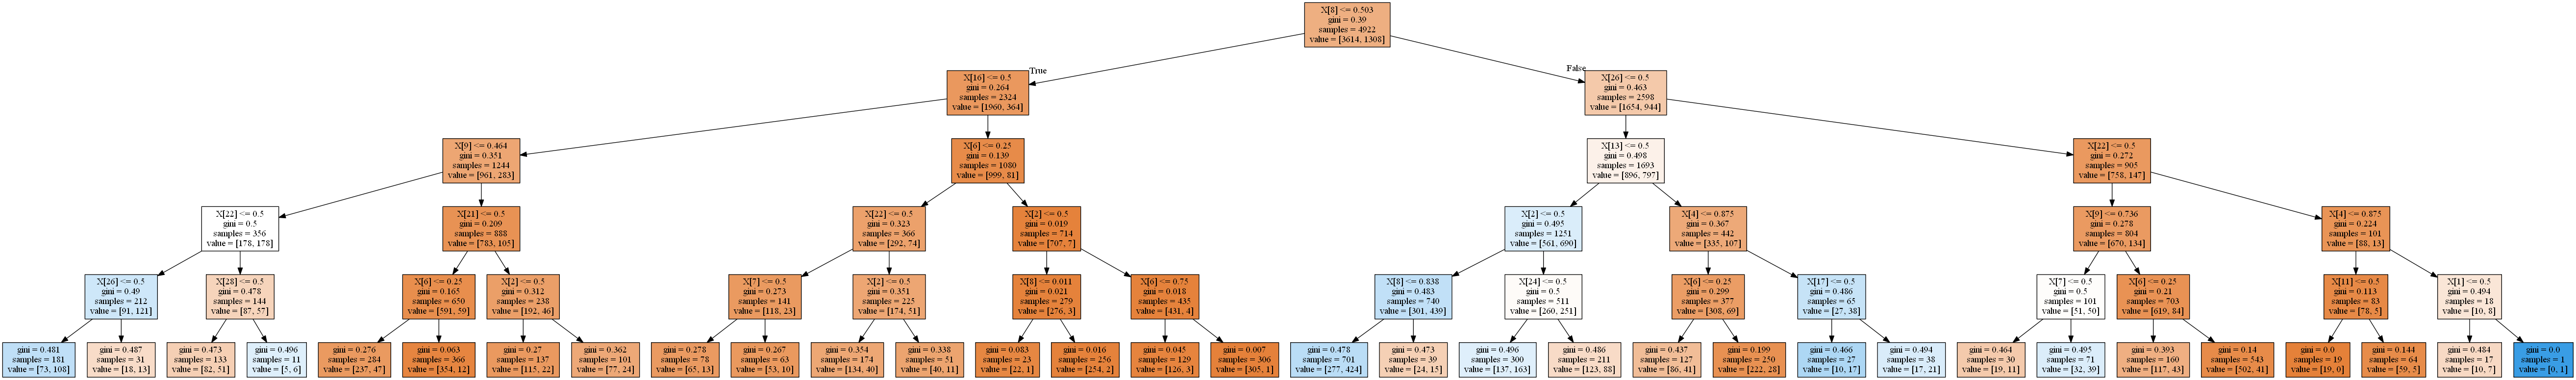

In [118]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt_grid.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'decision_tree_best_score.png'
graph.write_png(filename)
Image(filename=filename) 

Is it work better for sampled data?

In [122]:
dt_grid_over = GridSearchCV(dt,
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

dt_grid_over = dt_grid_over.fit(x_train_over, y_train_over)

In [123]:
print('Nodes: ', dt_grid_over.best_estimator_.tree_.node_count)

Nodes:  3463


In [124]:
print('Max depth: ', dt_grid_over.best_estimator_.tree_.max_depth)

Max depth:  18


In [126]:
print('Best estimators: ', dt_grid_over.best_estimator_)

Best estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=18.212231557140836,
                       max_features='auto', random_state=42)


## Machine Learning Model Metrics and Evaluation

First, I will create a function to collect all metrics I am interested in.

In [128]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

Next, having this function working I can create a new dataframe containing all metrics from models I just created. 

In this step I will shows two dataframe with metrics based on data I used to create: normal training set and sample set.

In [136]:
full_metrics_normal = pd.concat([measure_error(y_test, y_pred_lr, 'LogisticRegression'),
                              measure_error(y_test, y_pred_lr_cv, 'Tuned LogisticRegression'),
                             measure_error(y_test, y_pred_knn, 'KNN'),
                          measure_error(y_test, y_pred_knn_best, 'Tuned KNN'),
                          measure_error(y_test, y_pred_svc, 'SVM'),
                         measure_error(y_test, y_pred_tree, 'DecisionTree'),
                                 measure_error(y_test, y_pred_grid_tree, 'Tuned DecisionTree')
                        ],
                              axis=1)

In [149]:
display(round(full_metrics_normal * 100, 2).style.set_caption('Metrics among data without sampling in %'))

,LogisticRegression,Tuned LogisticRegression,KNN,Tuned KNN,SVM,DecisionTree,Tuned DecisionTree
accuracy,79.860000,79.810000,75.260000,77.910000,75.500000,72.610000,74.830000
precision,65.380000,65.240000,53.770000,59.880000,55.000000,48.570000,52.620000
recall,51.520000,51.520000,49.550000,51.340000,43.140000,51.340000,53.650000
f1,57.630000,57.570000,51.580000,55.280000,48.350000,49.910000,53.130000


In [144]:
full_metrics_sampled = pd.concat([measure_error(y_test, y_pred_lr2, 'LogisticRegression'),
                              measure_error(y_test, y_pred_lr_cv_over, 'Tuned LogisticRegression'),
                             measure_error(y_test, y_pred_knn_over, 'KNN'),
                          measure_error(y_test, y_pred_knn_best_over, 'Tuned KNN'),
                          measure_error(y_test, y_pred_svc_over, 'SVM'),
                                 measure_error(y_test, y_pred_tree_over, 'DecisionTree'),
                     ],
                              axis=1)


In [148]:
display(round(full_metrics_sampled * 100, 2).style.set_caption('Metrics among sampled data in %'))

,LogisticRegression,Tuned LogisticRegression,KNN,Tuned KNN,SVM,DecisionTree
accuracy,75.070000,75.640000,70.190000,68.720000,74.080000,73.700000
precision,52.150000,53.030000,45.730000,45.150000,51.190000,50.460000
recall,75.580000,73.260000,64.880000,82.170000,53.650000,59.000000
f1,61.720000,61.530000,53.650000,58.280000,52.390000,54.400000


**Feature Importance**

In [232]:
feature_cols = X.columns
feature_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')

In [235]:
feature_imp = pd.Series(lr.coef_[0], index=feature_cols).sort_values(ascending=False)
feature_imp

InternetService_Fiber optic              1.159274
StreamingTV_Yes                          0.395475
StreamingMovies_Yes                      0.394897
MultipleLines_Yes                        0.309970
SeniorCitizen                            0.237349
PaperlessBilling                         0.214180
PaymentMethod_Electronic check           0.168305
Partner                                  0.142963
MultipleLines_No phone service           0.101884
MonthlyCharges                           0.083233
tenure                                   0.064161
DeviceProtection_Yes                     0.047180
gender                                  -0.018827
OnlineBackup_Yes                        -0.042890
PhoneService                            -0.101655
PaymentMethod_Credit card (automatic)   -0.160870
PaymentMethod_Mailed check              -0.175655
InternetService_No                      -0.184540
OnlineBackup_No internet service        -0.184540
StreamingTV_No internet service         -0.184540


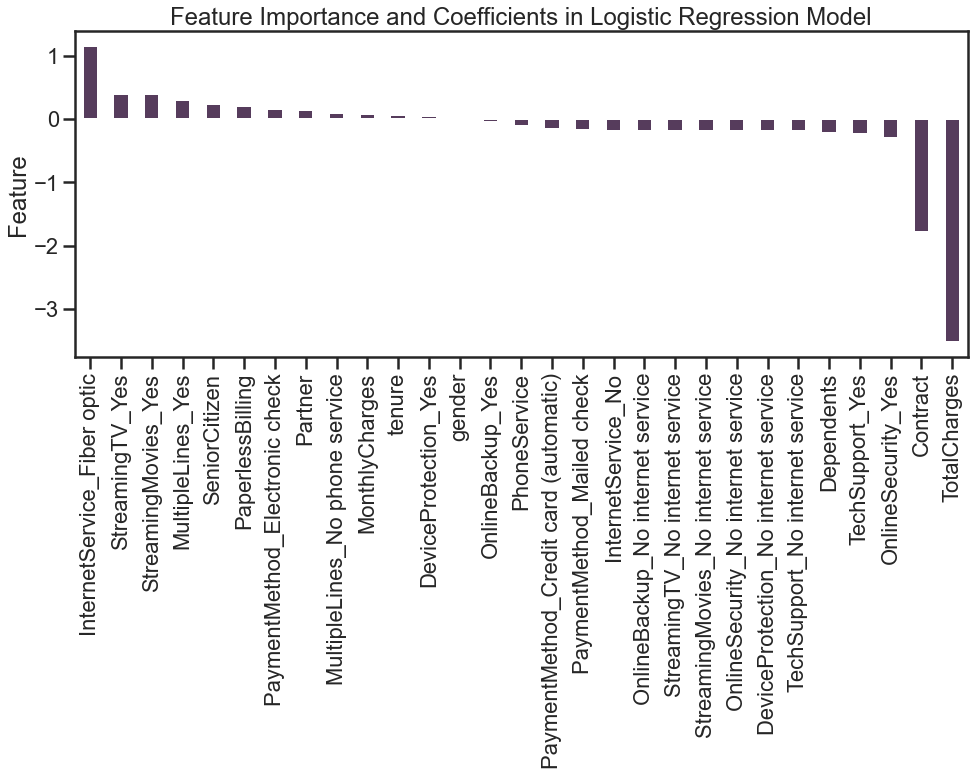

In [243]:
sns.set_context('poster')
plt.figure(figsize=(16,6))
ax = feature_imp.plot(kind='bar', color='#563c5c')
ax.set(ylabel='Relative Importance')
ax.set(ylabel='Feature')
plt.title('Feature Importance and Coefficients in Logistic Regression Model')
#plt.savefig('feature_imp.png')